To run this project make sure you have psycopg2, matplotlib and ipywidgets installed.
Change the connection to the database to run on your local machine

In [136]:
import time
import psycopg2
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import csv
conn = psycopg2.connect(database="cse412", user = "gatlinfarrington", password = "password", host = "localhost", port = "5432")
print("Connected to Database")

Connected to Database


Database opening and reading params

In [137]:
print("Opened Database")
cursor = conn.cursor()
#testing to make sure connection worked
print("PSQL server information")
print(conn.get_dsn_parameters(), "\n")

Opened Database
PSQL server information
{'user': 'gatlinfarrington', 'channel_binding': 'prefer', 'dbname': 'cse412', 'host': 'localhost', 'port': '5432', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'sslsni': '1', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'prefer', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 



# ##this will add the events that were missing from the table.

In [138]:
# eventQuery = "INSERT INTO event (name, date, eid, location) VALUES ("
# eid=101
# eventfile = 'ban08-12.csv'
# with open(eventfile, 'r',encoding='utf-8') as csvfile:
#     spamreader = csv.reader(csvfile, delimiter=',')
#     for row in spamreader:
#         date = ""
#         name = ""
#         location = ""
#         #print(row)
#         date = row[0]
#         name = row[1]
#         name = "".join(filter(lambda char: char != "'", name))
#         location = row[2]
#         print(date)
#         print(name)
#         print(location)
#         eventQuery = f'INSERT INTO event (name, date, eid, location) VALUES (\'{name}\', \'{date}\', \'{eid}\', \'{location}\');'
#         cursor.execute(eventQuery)
#         eid+=1
# conn.commit()

Build Country and abbreviation dictionary, run this to make sure that event can be linked to country

In [139]:
countryCodes = {}
rowCnt = 0
with open('countryCodes.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        if rowCnt != 0:
            countryCodes[row[0]] = row[2]
        rowCnt = rowCnt + 1

Dumping out athlete table, test DB read

In [140]:
SelectAthleteQuery = "SELECT * FROM athlete;"
cursor.execute(SelectAthleteQuery)
record = cursor.fetchall()
print("Current Database Contents: ")
print(record[0:10],"AND MORE")
conn.commit()

Current Database Contents: 
[('Ahmed', 'Abd El Raouf', 'Egypt', 'Hammer throw', 2), ('Inga', 'Abitova', ' Russia', 'Long distance', 3), ('Folashade', 'Abugan', ' Nigeria', 'Sprinting', 4), ('Ibrahim', 'Mohamed Aden', 'Somalia', 'Middle distance', 5), ('Tosin', 'Adeloye', 'Nigeria', 'Sprinting', 6), ('Funke', 'Adeoye', 'Nigeria', 'Hammer throw', 7), ('Alessandra', 'Aguilar', 'Spain', 'Long distance', 8), ('Amina', 'At Hammou', 'Morocco', 'Middle distance', 9), ('Seltana', 'At Hammou', 'Morocco', 'Middle distance', 10), ('Chioma', 'Ajunwa', 'Nigeria', 'Long jump, sprinting', 11)] AND MORE


Most frequently used substances

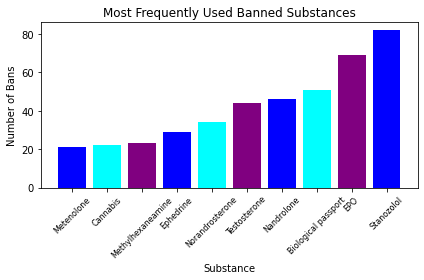

In [141]:
#FOR THE BAR GRAPH OF SUBSTANCES
athlete=[]
event=[]
substances={}
bans={}
cursor.execute(f'SELECT * FROM ban;')
rows=cursor.fetchall()
for row in rows:
    if row[1]!='Anabolic steroids' and row[1]!="":
        if row[1] not in substances:
            substances.update({row[1]: 1})
        else:
            substances[row[1]]+=1
    if row[4]!="" and row[4].isnumeric() and int(row[4])<2022:
        if row[4] not in bans:
            bans.update({row[4]: 1})
        else:
            bans[row[4]]+=1
sorted_substances = sorted(substances.items(), key=lambda x:x[1])
while len(sorted_substances)>10:
    sorted_substances.pop(0)
sub = dict(sorted_substances)
#print(sub)
plt.bar(sub.keys(), sub.values(), color=['blue', 'cyan', 'purple'])
plt.xticks(fontsize=8, rotation=45)
plt.tight_layout()
plt.title("Most Frequently Used Banned Substances")
plt.xlabel("Substance")
plt.ylabel("Number of Bans")
plt.tight_layout()
plt.show()

Years with teh most bans

[('1972', 1), ('2017', 1), ('2020', 2), ('1980', 2), ('1983', 2), ('1988', 2), ('1976', 2), ('1975', 2), ('1986', 3), ('1979', 3), ('1985', 4), ('1981', 4), ('1989', 5), ('1978', 5), ('1984', 5), ('1977', 5), ('1991', 6), ('1998', 8), ('1994', 9), ('1997', 10), ('1990', 10), ('1987', 10), ('1995', 12), ('1992', 12), ('2016', 13), ('2002', 13), ('2000', 14), ('1996', 17), ('1993', 17), ('1999', 20), ('2001', 29), ('2015', 31), ('2005', 34), ('2003', 35), ('2006', 38), ('2007', 42), ('2004', 45), ('2014', 48), ('2008', 52), ('2010', 53), ('2013', 62), ('2009', 64), ('2012', 66), ('2011', 73)]


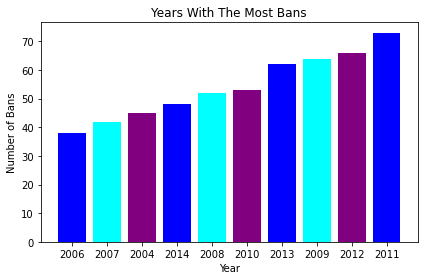

In [142]:
#FOR THE TOTAL # Bans PER YEAR
sorted_bans = sorted(bans.items(), key=lambda x:x[1])
sorted_years = sorted(bans.items(), key=lambda x: x[0])
print(sorted_bans)
while len(sorted_bans)>10:
    sorted_bans.pop(0)
while len(sorted_years)>20:
    sorted_years.pop(0)
ban_years=dict(sorted_years)
ban_dic = dict(sorted_bans)
#print(sub)
plt.bar(ban_dic.keys(), ban_dic.values(), color=['blue', 'cyan', 'purple'])
plt.title("Years With The Most Bans")
plt.xlabel("Year")
plt.ylabel("Number of Bans")
plt.tight_layout()
plt.show()

{'1999': 20, '2000': 14, '2001': 29, '2002': 13, '2003': 35, '2004': 45, '2005': 34, '2006': 38, '2007': 42, '2008': 52, '2009': 64, '2010': 53, '2011': 73, '2012': 66, '2013': 62, '2014': 48, '2015': 31, '2016': 13, '2017': 1, '2020': 2}


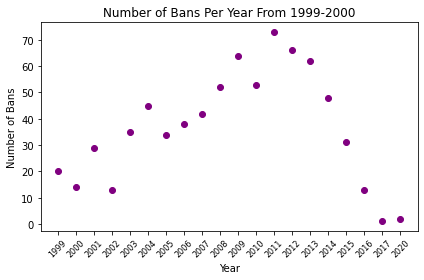

In [143]:
#scatter plot for the years
print(ban_years)
plt.scatter(ban_years.keys(), ban_years.values(), color='purple')
plt.xticks(fontsize=8, rotation=45)
plt.title("Number of Bans Per Year From 1999-2000")
plt.xlabel("Year")
plt.ylabel("Number of Bans")
plt.tight_layout()
plt.show()

Number of Bans per Event

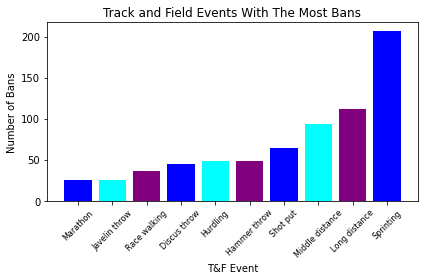

In [144]:
#FOR THE NUMBER OF BANS PER COUNTRY
cursor.execute('SELECT count(*), event FROM athlete GROUP BY event ORDER BY count(*) desc;')
rows=cursor.fetchall()
countries={}
events={}
for row in rows:
    if row[1] not in events:
        events.update({row[1]: 1})
        events[row[1]] = int(row[0])
sorted_events = sorted(events.items(), key=lambda x: x[1])
while len(sorted_events)>10:
    sorted_events.pop(0)
event_dic = dict(sorted_events)
plt.bar(event_dic.keys(), event_dic.values(), color=['blue', 'cyan', 'purple'])
plt.xticks(fontsize=8, rotation=45)
plt.title("Track and Field Events With The Most Bans")
plt.xlabel("T&F Event")
plt.ylabel("Number of Bans")
plt.tight_layout()
plt.show()

Number of Bans per Country

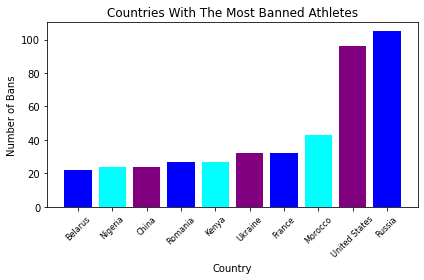

In [145]:
cursor.execute('SELECT count(*), country FROM athlete GROUP BY country ORDER BY count(*) desc;')
rows = cursor.fetchall()
for row in rows:
    if row[1] not in events:
        countries.update({row[1]: 1})
        countries[row[1]] = int(row[0])
sorted_count = sorted(countries.items(), key=lambda x:x[1])
while len(sorted_count)>10:
    sorted_count.pop(0)
country_dic = dict(sorted_count)
plt.bar(country_dic.keys(), country_dic.values(), color=['blue', 'cyan', 'purple'])
plt.xticks(fontsize=8, rotation=45)
plt.title("Countries With The Most Banned Athletes")
plt.xlabel("Country")
plt.ylabel("Number of Bans")
plt.tight_layout()
plt.show()

Find the people that have been banned more than once.

In [146]:
query = 'SELECT fName, lName, count(*) AS repeats FROM athlete GROUP BY fName, lName HAVING count(*) > 1;'
cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(row[0], '', row[1], 'has been banned', row[2], 'times.')

Barakat  Al-Harthi has been banned 2 times.
Mohamed  El Hachimi has been banned 2 times.


In [147]:
allCountries = [] #Global List of Countries in Database
allSubstances = [] #Global List of Countries in Database

cursor.execute('SELECT DISTINCT country FROM athlete ORDER BY country;')
rows = cursor.fetchall()
for row in rows:
    if row[0] != '':
        if row[0][0] != ' ':
            allCountries.append(row[0]) 
        else:
            allCountries.append(row[0][1:len(row[0])]) #Get rid of the space at the beginning of a few entries

cursor.execute('SELECT DISTINCT substance FROM ban ORDER BY substance;')
rows = cursor.fetchall()
for row in rows:
    allSubstances.append(row[0])

Build Lists of Countries and Substances

Select which country and or substance to look at information on

In [148]:
countryMenu = widgets.Dropdown(options=allCountries, description="Country:")
countryMenu
substanceMenu = widgets.Dropdown(options=allSubstances, description ="Substance:")
substanceMenu
items = [substanceMenu, countryMenu]
box = widgets.Box(children=items)
box

Box(children=(Dropdown(description='Substance:', options=('(BALCO scandal)', '(not illegal at the time)', '17_…

Get the Average bans per year in a specific country

In [149]:
query = f"SELECT count(bid) FROM ban, athlete WHERE athlete.aid = ban.aid AND athlete.country = \'{countryMenu.value}\';"
cursor.execute(query)
numBans = cursor.fetchall()[0][0]
print(f'The country: {countryMenu.value} has had {numBans} bans committed against athletes from that country.')

The country: Nigeria has had 22 bans committed against athletes from that country.


Show the number of bans for the selected substance

In [150]:
query = f"SELECT count(*) FROM ban WHERE substance=\'{substanceMenu.value}\';"
cursor.execute(query)
numBans = cursor.fetchall()[0][0]
print(f'There have been {numBans} ban(s) due to {substanceMenu.value} being used.')

There have been 1 ban(s) due to (BALCO scandal) being used.


Show the events that have happened in the given country (using the countryCodes dictionary built at the top of the notebook)

In [151]:
#SELECT SUBSTRING(location, length(location)-3, 3) FROM event; will give the country code from event
query = f"SELECT name, date FROM event WHERE SUBSTRING(location, length(location)-3, 3) = \'{countryCodes[countryMenu.value]}\';"
cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(f"The event: {row[0]} took place in {countryMenu.value} ({countryCodes[countryMenu.value]}) on {row[1]}")

Athletes potentially doping for specific events (matching country of athlete, country of event, time of ban and time of event):

In [152]:
#Need to populate the event table with events pre 2020 for this to work properly. Web scraping the data
#Source is proving to be a challenge.
query = f"""SELECT athlete.fName AS firstName, athlete.lName AS LastName, event.name AS 
eventName, ban.date, ban.substance FROM ban, athlete, event 
WHERE athlete.aid = ban.aid AND 
athlete.country = \'{countryMenu.value}\' 
AND SUBSTRING(event.location, length(event.location)-3, 3) = \'{countryCodes[countryMenu.value]}\'
AND ban.date = SUBSTRING(event.date, length(event.date) - 3, 4);"""
cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(f"{row[0]} {row[1]} Was potentially banned from {row[2]} in {row[3]} for using {row[4]} ")

All athletes and their ban information from a given country

In [153]:
query = f"""
SELECT * FROM athlete, ban 
WHERE athlete.aid = ban.aid 
AND athlete.country = \'{countryMenu.value}\'"""
#could also be
query = f"""SELECT * FROM 
athlete JOIN ban ON athlete.aid = ban.aid 
WHERE athlete.country = \'{countryMenu.value}\'"""

cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(row)

('Tosin', 'Adeloye', 'Nigeria', 'Sprinting', 6, 6, 'Metenolone', '2 years', 6, '2012')
('Tosin', 'Adeloye', 'Nigeria', 'Sprinting', 6, 7, 'Exogenous steroids', '8 years', 6, '2015')
('Funke', 'Adeoye', 'Nigeria', 'Hammer throw', 7, 8, 'Ephedrine', 'Public warning', 7, '2007')
('Gloria', 'Amuche Nwosu', 'Nigeria', 'Sprinting', 25, 30, 'Testosterone', '2 years', 25, '2005')
('Olutoyin', 'Augustus', 'Nigeria', 'Hurdles', 53, 58, 'Abnormaltestosteronelevels', '2 years', 53, '2009')
('Vivian', 'Chukwuemeka', 'Nigeria', 'Shot put and discus', 178, 202, 'Oxymetholone', '2 years', 178, '2009')
('Vivian', 'Chukwuemeka', 'Nigeria', 'Shot put and discus', 178, 203, 'Stanozolol', 'Life ban', 178, '2012')
('Daniel', 'Effiong', 'Nigeria', 'Sprinting', 252, 285, 'Methyltestosteroneandephedrine', '4 years', 252, '1995')
('Christy', 'Ekpukhon', 'Nigeria', 'Sprinting', 255, 288, 'Metenolone', '2 years', 255, '2008')
('Davidson', 'Ezinwa', 'Nigeria', 'Sprinting', 277, 312, 'Ephedrine', '3 months', 277, '

In [164]:
numberBoxMonths = widgets.IntText(value=1,
    description='Months:',
    disabled=False)
numberBoxYears = widgets.IntText(value=1,
    description='Years:',
    disabled=False)
items = [numberBoxMonths, numberBoxYears]
box = widgets.Box(children=items)
box

Box(children=(IntText(value=1, description='Months:'), IntText(value=1, description='Years:')))

In [167]:
query = f"""SELECT * FROM athlete JOIN ban ON athlete.aid = ban.aid
WHERE ban.banlength LIKE \'{numberBoxYears.value} years\'"""
cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(f"{row[0]} {row[1]} got banned for {row[7]} due to the use of {row[6]}")

Mohamed El Hachimi got banned for 6 years due to the use of CERA
Rbert Fazekas got banned for 6 years due to the use of Stanozolol
Mohamed El Hachimi got banned for 6 years due to the use of CERA


In [168]:
query = f"""SELECT * FROM athlete JOIN ban ON athlete.aid = ban.aid
WHERE ban.banlength LIKE \'{numberBoxMonths.value} months\'"""
cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(f"{row[0]} {row[1]} got banned for {row[7]} due to the use of {row[6]}")

Jessica Cosby got banned for 4 months due to the use of Hydrochlorothiazide,chlorothiazide
Abdellah Haidane got banned for 4 months due to the use of Tuaminoheptane
Rhys Williams got banned for 4 months due to the use of 17_-hydroxyestra-4,9-diene-3-one
